In this notebook I attempt to overplot STIX on AIA as seen from AIA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames, get_body_heliographic_stonyhurst, get_horizons_coord, transform_with_sun_center

from astropy.io import fits
from sunpy.map import Map
from astropy.time import Time
from sunpy.map import get_observer_meta

from sunpy.net import Fido
from sunpy.net import attrs as a

In [2]:
u.add_enabled_units([u.def_unit("arcsecs", 1 * u.arcsec)])

### Load a STIX image

This image has been saved in IDL with map2fits.pro

In [3]:
file = "data/STIX/stixmaptest.fits"
stixmap = sunpy.map.Map(file)

In [4]:
print(stixmap.meta)

simple: True
bitpix: -64
naxis: 2
naxis1: 129
naxis2: 129
date: 2023-02-15
ctype1: solar_x
ctype2: solar_y
cunit1: arcsecs
cunit2: arcsecs
crpix1: 11.1142832531
crpix2: 364.915383314
crval1: 0
crval2: 0
cdelt1: 2.0
cdelt2: 2.0
date_obs: 28-Oct-2021 15:27:37.797
date-obs: 28-Oct-2021 15:27:37.797
exptime: 26.5
origin: STX MEM_GE:
crota1: 0.0
crota2: 0.0
crotacn1: 0.0
crotacn2: 0.0
l0: -2.81644
b0: 2.18898
rsun: 1193.19
coord_fr: SOLO HPC
units: counts cm^-2 asec^-2 s^-1 keV^-1
filename: stixmaptest.fits
comment: 
history: 
keycomments: {'SIMPLE': 'Written by IDL:  Wed Feb 15 18:14:27 2023', 'BITPIX': 'Real*8 (double precision)', 'CTYPE1': 'Solar X (cartesian west) axis', 'CTYPE2': 'Solar Y (cartesian north) axis', 'CUNIT1': 'Arcseconds from center of Sun', 'CUNIT2': 'Arcseconds from center of Sun', 'CRPIX1': 'Reference pixel along X dimension', 'CRPIX2': 'Reference pixel along Y dimension', 'CRVAL1': 'Reference position along X dimension', 'CRVAL2': 'Reference position along Y dimension

Add the Solar Orbiter information to the metadata

In [5]:
solo_pos = get_horizons_coord("SOLO", stixmap.date)
stixmap.meta.update(get_observer_meta(solo_pos, rsun=solo_pos.rsun))

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


In [6]:
print(stixmap.meta)

simple: True
bitpix: -64
naxis: 2
naxis1: 129
naxis2: 129
date: 2023-02-15
ctype1: solar_x
ctype2: solar_y
cunit1: arcsecs
cunit2: arcsecs
crpix1: 11.1142832531
crpix2: 364.915383314
crval1: 0
crval2: 0
cdelt1: 2.0
cdelt2: 2.0
date_obs: 28-Oct-2021 15:27:37.797
date-obs: 28-Oct-2021 15:27:37.797
exptime: 26.5
origin: STX MEM_GE:
crota1: 0.0
crota2: 0.0
crotacn1: 0.0
crotacn2: 0.0
l0: -2.81644
b0: 2.18898
rsun: 1193.19
coord_fr: SOLO HPC
units: counts cm^-2 asec^-2 s^-1 keV^-1
filename: stixmaptest.fits
comment: 
history: 
keycomments: {'SIMPLE': 'Written by IDL:  Wed Feb 15 18:14:27 2023', 'BITPIX': 'Real*8 (double precision)', 'CTYPE1': 'Solar X (cartesian west) axis', 'CTYPE2': 'Solar Y (cartesian north) axis', 'CUNIT1': 'Arcseconds from center of Sun', 'CUNIT2': 'Arcseconds from center of Sun', 'CRPIX1': 'Reference pixel along X dimension', 'CRPIX2': 'Reference pixel along Y dimension', 'CRVAL1': 'Reference position along X dimension', 'CRVAL2': 'Reference position along Y dimension

### Plot STIX image

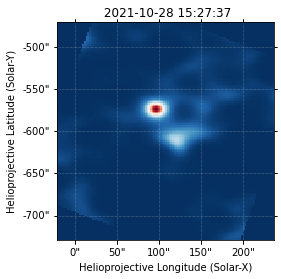

In [7]:
fig = plt.figure()
stixmap.plot(cmap='RdBu_r')
plt.show()

### Load AIA image

In [8]:
aiafile='data\\AIA\\aia_lev1_1600a_2021_10_28t15_27_50_13z_image_lev1.fits'
aia_map = sunpy.map.Map(aiafile)

In [9]:
print(aia_map.meta)

simple: True
bitpix: 16
naxis: 2
naxis1: 4096
naxis2: 4096
bld_vers: V9R41X
lvl_num: 1.0
t_rec: 2021-10-28T15:27:52Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2021-11-01T08:00:57
telescop: SDO/AIA
instrume: AIA_3
date-obs: 2021-10-28T15:27:50.13
t_obs: 2021-10-28T15:27:51.58Z
camera: 3
img_type: LIGHT
exptime: 2.900744
expsdev: 0.000156
int_time: 3.15625
wavelnth: 1600
waveunit: angstrom
wave_str: 1600
fsn: 244469426
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 16052
datamedn: 8
datamean: 31.16
datarms: 67.85
dataskew: 125.88
datakurt: 24483.92
datacent: 79.6
datap01: 0.0
datap10: 2.0
datap25: 3.0
datap75: 58.0
datap90: 74.0
datap95: 84.0
datap98: 100.0
datap99: 118.0
nsatpix: 76
oscnmean: nan
oscnrms: nan
flat_rec: aia.flatfield[:#662]
nspikes: 0
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 0.609373
crpix1: 2051.939697
ctype2: HPLT-TAN
cunit2: arcsec
crval2: 0.0
c

In [10]:
print(aia_map.meta["rsun_ref"], stixmap.meta["rsun_ref"])

696000000.0 695700000.0


In [11]:
print(aia_map.meta["rsun_obs"], stixmap.meta["rsun_obs"])

966.064266 1193.192521948077


### Plot full disk AIA

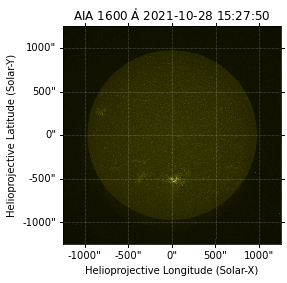

In [12]:
fig = plt.figure()
aia_map.plot()
plt.show()

### Plot submaps

In [13]:
bottom_left = SkyCoord(-100 * u.arcsec, -650 * u.arcsec, frame=aia_map.coordinate_frame)
top_right = SkyCoord(150 * u.arcsec, -400 * u.arcsec, frame=aia_map.coordinate_frame)

sub_aia = aia_map.submap(bottom_left, top_right=top_right)
sub_stx = stixmap.submap(bottom_left, top_right=top_right)

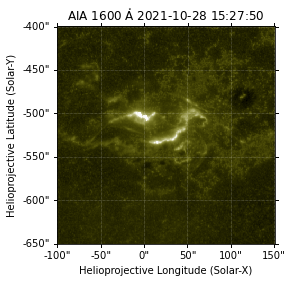

In [14]:
fig = plt.figure()
sub_aia.plot()
plt.show()

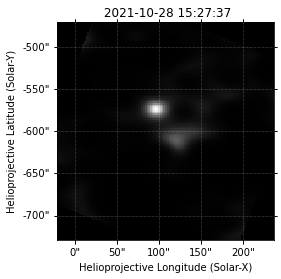

In [15]:
fig = plt.figure()
sub_stx.plot()
plt.show()

### Overplot STIX on AIA

In [16]:
levels = [20, 40.,60.,80.,90.]*u.percent

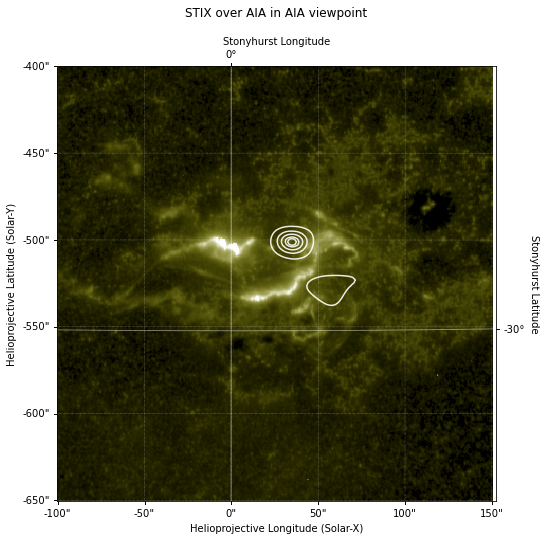

In [21]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection=sub_aia)
sub_aia.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
sub_aia.draw_grid(axes=ax)

ax.set_title("STIX over AIA in AIA viewpoint", y=1.1)

cset = sub_stx.draw_contours(levels, axes=ax, alpha=0.9, colors='white')

plt.show()